---

# Centro de Investicgación en Computación, IPN
# Metaheurísticas

## Algoritmos Genéticos: Selección

Cesar Macias Sanchez

Miguel Angel Soto Hernandez

## Importaciones necesarias

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## Petición de datos

In [115]:
# Definiendo parámetros
tamano_poblacion = 50
numero_generaciones = 100
peso_maximo = 100
padres = 2

In [5]:
# Definir el tamaño del genoma
tamano_genoma = int(input('Tamaño del genoma: '))
tamano_genoma

10

## Funciones necesarias

In [17]:
def generar_pesos_valores():
    pesos = np.random.randint(0, 50, size = tamano_genoma).tolist()
    valores = np.random.randint(0, 100,size = tamano_genoma).tolist()
    return pesos, valores

In [18]:
pesos, valores = generar_pesos_valores()
print(f'Pesos: {pesos}')
print(f'Valores: {valores}')

Pesos: [1, 10, 7, 23, 6, 16, 39, 18, 10, 33]
Valores: [52, 60, 75, 82, 39, 84, 60, 37, 18, 22]


In [19]:
def evaluacion(genoma, pesos, valores, peso_maximo):
  total_valores = 0
  total_pesos = 0

  for indice, objeto in enumerate(genoma):
    if objeto == 1:
      total_valores += valores[indice]
      total_pesos += pesos[indice]

  if total_pesos > peso_maximo:
    return 0, total_pesos
  else:
    return total_valores, total_pesos

## 1. Generar población

In [20]:
# Inicializar la población
poblacion = []
for i in range(tamano_poblacion):
    poblacion.append(np.random.randint(2, size = tamano_genoma).tolist())

poblacion[:4]

[[0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0, 0, 0]]

## 2. Selecciones

### Parámetros generales

In [21]:
# Generar ajustes y pesos de la población
ajustes_poblacion = []
pesos_poblacion = []

for genoma in poblacion:
    ajuste_genoma, peso_genoma = evaluacion(genoma, pesos, valores, peso_maximo)
    ajustes_poblacion.append(ajuste_genoma)
    pesos_poblacion.append(peso_genoma)

print(f'Ajustes poblacion: {len(ajustes_poblacion)}')
print(f'Pesos poblacion: {len(pesos_poblacion)}')

Ajustes poblacion: 50
Pesos poblacion: 50


In [25]:
total_ajustes = sum(ajustes_poblacion)
total_ajustes

9754

In [29]:
porcentajes = []
for ajuste in ajustes_poblacion:
    porcentaje = round((ajuste / total_ajustes) * (2 * math.pi), 4)
    porcentajes.append(porcentaje)

porcentajes[:4]

### Selección por ruleta

In [59]:
def flecha():
    return random.random() * (2 * math.pi)

In [126]:
def seleccion_ruleta(porcentajes):
    i = 0
    porcentaje = 0
    flecha_aleatoria = flecha()    

    while porcentaje <= flecha_aleatoria:
        porcentaje += porcentajes[i]
        indice = i
        i += 1

    plt.style.use('dark_background')
    plt.figure(figsize = (15, 15))
    plt.pie(porcentajes, labels = [i for i in range(len(porcentajes))], )
    plt.arrow(0, 0, 0.8 * math.cos(flecha_aleatoria), 0.8 * math.sin(flecha_aleatoria), 
                                                        width = .01, facecolor = 'black')
    plt.show()
    
    return indice

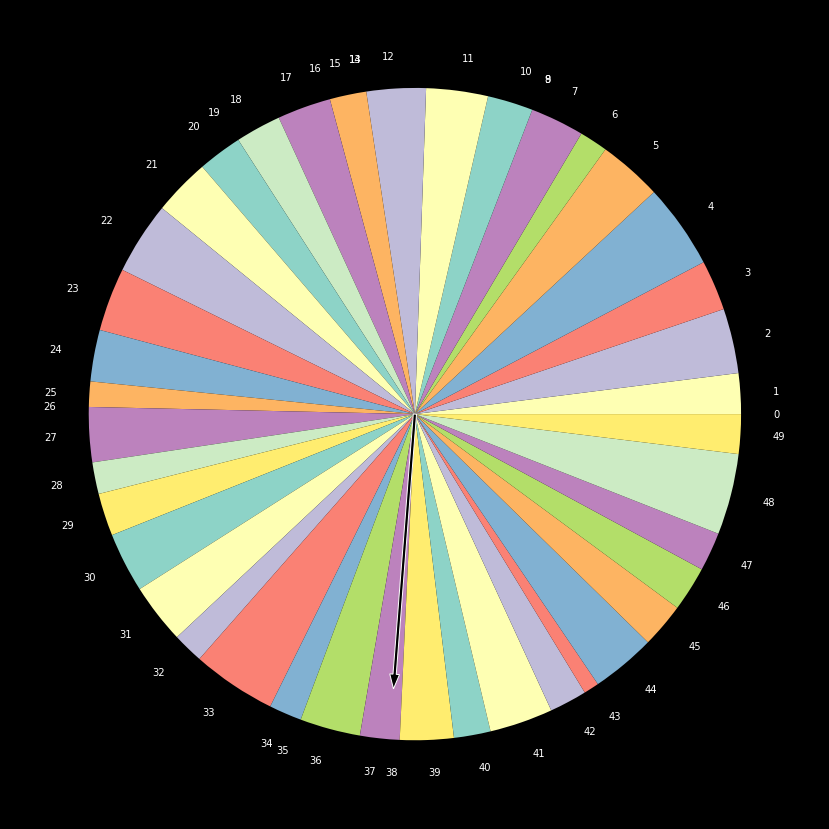

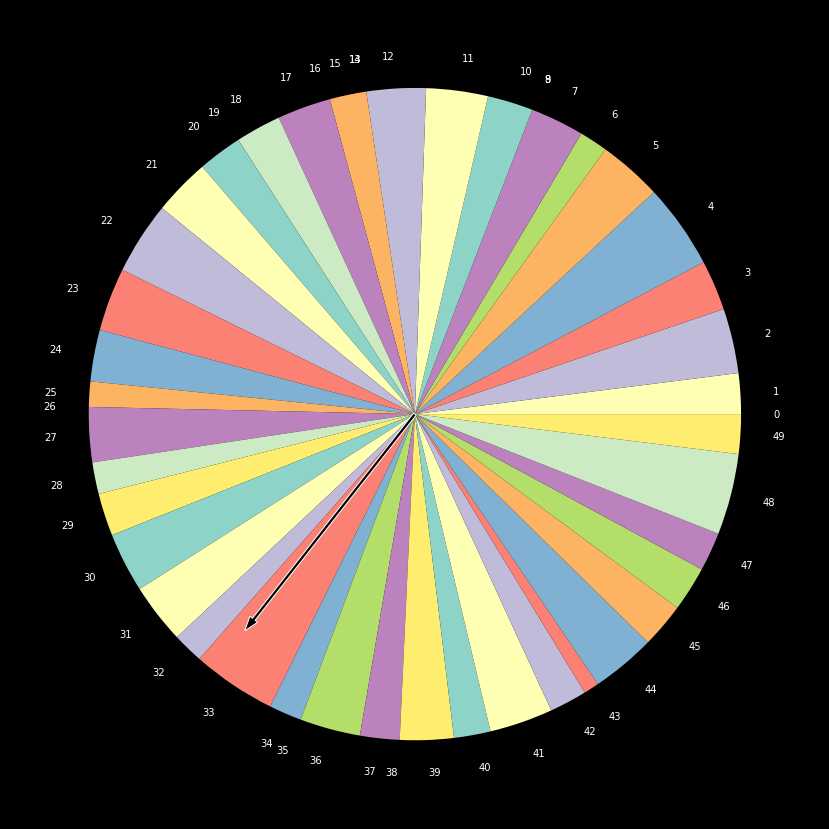

In [127]:
padres_ruleta = []

for i in range(padres):
    padres_ruleta.append(poblacion[seleccion_ruleta(porcentajes)])    

In [128]:
print(f'Padres ruleta: {padres_ruleta}')

Padres ruleta: [[1, 0, 0, 0, 0, 1, 0, 1, 1, 0], [1, 1, 1, 0, 1, 1, 1, 1, 0, 0]]


### Selección por torneo

In [96]:
k = 5

In [112]:
def seleccion_torneo(k):
    ajustes_torneo = []
    indices = np.random.randint(0, len(poblacion) - 1, size = k).tolist()

    for indice in indices:
        ajustes_torneo.append(ajustes_poblacion[indice])

    seleccionado_torneo = indices[ajustes_torneo.index(max(ajustes_torneo))]
    return seleccionado_torneo


In [131]:
padres_torneo = []

for i in range(padres):
    padres_torneo.append(poblacion[seleccion_torneo(k)])

In [132]:
print(f'Padres torneo: {padres_torneo}')

Padres torneo: [[1, 1, 1, 0, 0, 1, 0, 0, 1, 1], [1, 0, 1, 1, 1, 1, 0, 0, 1, 0]]


### Selección por emparejado variado inverso (NAM)

In [130]:
# Muestra aleatoria de padres
n = 10

In [162]:
def seleccion_nam(n):
    ajustes_nam = []
    distancias = []
    padre_1 = random.randint(0, len(poblacion) - 1)
    ajuste_padre_1 = ajustes_poblacion[padre_1]
    muestra = np.random.randint(0, len(poblacion) - 1, size = n).tolist()

    for indice in muestra:
        ajustes_nam.append(ajustes_poblacion[indice])

    for ajuste in ajustes_nam:
        distancias.append(int(math.fabs(ajuste_padre_1 - ajuste)))

    padre_2 = muestra[distancias.index(max(distancias))]
    
    return [poblacion[padre_1], poblacion[padre_2]]

In [164]:
padres_nam = seleccion_nam(n)
print(f'Padres NAM: {padres_nam}')

Padres NAM: [[0, 0, 0, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 1, 0]]
